In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from tqdm import tqdm
from ipywidgets import *
import pickle
from Classes import *
from Functions import *


def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)   
def load_obj(name):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [2]:
n = 50
m = 1
s = 1
M  = np.array(n*[np.linspace(0 ,  m, n)])
S = np.array(n*[np.linspace(s,0.001, n)]).T

# Base Case

In [3]:
#BaseCase
M0 = M.copy()
S0 = S.copy()

X = norm.cdf(0,M,S)
X_ = X.copy()
for i in range(100):
    X  = norm.cdf(X,M,S)
    
Xbase = X.copy()
Xbasenet = X-X_

# Numerical

In [8]:
ResultsSim = load_obj("ResultsSim")
#ResultsAna = load_obj("ResultsAna")

In [10]:
#save_obj(ResultsSim,"ResultsSim")
save_obj(ResultsAna,"ResultsAna")

In [6]:
shifts = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,1,1.25,1.5,1.75,2,2.5,3,3.5,4,5,8,10]


In [9]:
#Analytical Mean Field
for Mshift in tqdm(shifts): 
    try:
        ResultsAna[Mshift]
    except:
        ResultsAna[Mshift]={}
        
    M0 = M.copy() + Mshift
    S0 = S.copy()
    
    #con
    results = []
    X = norm.cdf(0,M,S)
    X_ = X.copy()
    for i in range(50):
        results.append(X)
        X_1 = X.copy()
        X  = norm.cdf(X,M,S) - norm.cdf((1-X),M0,S0)*X
        if np.array_equal(X_1, X):
            break
    ResultsAna[Mshift]["out"]=np.array(results)
    
    #red
    X_list = []
    X = norm.cdf(0,M,S)
    X_ = X.copy()
    for i in range(100):
        X_list.append(X)
        X_1 = X.copy()
        X  = norm.cdf(X,M,S) - norm.cdf((1-X)/X,M0,S0)*X
        if np.array_equal(X_1, X):
            break
    ResultsAna[Mshift]["red"]=np.array(X_list)

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:08<00:00,  4.27it/s]


In [5]:
#Simulation Mean field
for Mshift in tqdm(shifts): 
    try:
        ResultsSim[Mshift]
    except:
        ResultsSim[Mshift]={}
    
    for typ in ["out","red"]:
        print(Mshift,typ)
        def ABM_net(par):
            abm = ABM_MF(50000, par, phi2 = typ)
            abm.step(50)
            return abm.X
        try:
            ResultsSim[Mshift][typ]
        except:
            M0 = M.copy()+Mshift
            S0 = S.copy()

            results =np.array([np.array(list(map(ABM_net,par))) for par in tqdm(np.dstack((M,S,M0,S0)), leave = False)])
            ResultsSim[Mshift][typ]=results
            save_obj(ResultsSim,"ResultsSim")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

0 out
0 red
0.05 out
0.05 red
0.1 out
0.1 red
0.15 out
0.15 red
0.2 out
0.2 red



  0%|                                                                                           | 0/50 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

 64%|████████████████████████████████████████████████████▍                             | 32/50 [54:17<18:41, 62.28s/it]C:\Users\snied\OneDrive\Dokumente\ETH\Agent-Based Modelling of Social Systems\ABM-Project-FS21\Classes.py:132: RuntimeWarning: divide by zero encountered in long_scalars
  return np.array(self.N*[(self.N-sum(self.s))/ np.sum(self.s)])

 50%|███████████████████████████████████████                                       | 5/10 [1:15:34<1:15:34, 906.81s/it]

0.25 out



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [30:52<00:00,  5.60s/it]
                                                                                                                       

0.25 red



 60%|██████████████████████████████████████████████▏                              | 6/10 [2:56:55<2:43:56, 2459.25s/it]

0.3 out



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [32:01<00:00,  6.77s/it]
                                                                                                                       

0.3 red



 70%|█████████████████████████████████████████████████████▉                       | 7/10 [4:38:40<2:57:38, 3552.84s/it]

0.35 out



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [34:26<00:00, 10.08s/it]
                                                                                                                       

0.35 red



 80%|█████████████████████████████████████████████████████████████▌               | 8/10 [6:30:19<2:29:53, 4496.67s/it]

0.4 out



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [34:53<00:00,  6.41s/it]
                                                                                                                       

0.4 red



 90%|█████████████████████████████████████████████████████████████████████▎       | 9/10 [8:19:30<1:25:13, 5113.01s/it]

0.45 out



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [31:29<00:00,  6.32s/it]
                                                                                                                       

0.45 red



100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [10:07:41<00:00, 5526.37s/it]


In [21]:
def plot_X(X,ax):    
    ax.pcolormesh(M, S, X,vmin = 0, vmax=1,rasterized=True) 
    return
def plot_contour(X,X_1,ax,cut=0.01, Levels = 3,Contour="Xbase"):
    if Contour == "Xbase":
        Xcontour = Xbase.copy()
    elif Contour == "Xbasenet":
        Xcontour = Xbasenet.copy()
    else:
        Xcontour = (M<Contour)*(S<Contour)
    if Levels == 2:
        levels = [cut]
    else:
        levels = [cut,(1-cut)]    
    ax.contour(M, S, Xcontour, levels = levels,colors="darkorange",linewidths = 0.5)
    ax.contour(M, S, X,        levels = levels,colors="k",linewidths = 0.5)
    diff=abs(X-X_1)
    diff[-1][-1]=1
    ax.contour(M, S, diff, levels = [0.01],colors="w",linewidths = 0.5)
    return

def contour_count(cut, X,X_1,Contour="Xbase"):
    if Contour == "Xbase":
        Xlist = Xbase > cut
        Xsize = np.sum(Xlist)
    elif Contour == "Xbasenet":
        Xlist = Xbasenet > cut
        Xsize = np.sum(Xlist)
    else:
        Xlist = (M<Contour)*(S<Contour)
        Xsize = np.sum(Xlist)
    Y = X + X_1    
    Z = np.array([np.sum((y<2*cut)*Xlist)/Xsize for y in Y])
    O  = np.array([np.sum((y>2*(1-cut))*Xlist)/Xsize for y in Y])
    MIX  =1-Z-O
    F = np.array([np.sum((abs(diff)<0.02)*Xlist)/Xsize for diff in X-X_1])
    Z0= np.sum(Xbase[Xlist]<cut)/Xsize
    O0 = np.sum(Xbase[Xlist]>1-cut)/Xsize
    M0 = 1-Z0-O0
    return Z,O,MIX,F,Z0,O0,M0

def plot_stats(ax, X, X_1, cut=0.2, Contour="Xbase", xlim = 1, label = False):
    Z,O,M,F,Z0,O0,M0 = contour_count(cut, X,X_1,Contour)
    ax.plot(shifts, Z, label = label*"zero")
    ax.plot(shifts, O, label = label*"one")
    ax.plot(shifts, M, label = label*"mix")
    ax.plot(shifts, [1-i for i  in F], label = label*"fluc")
    ax.plot(shifts, F, label = label*"equi")
    ax.hlines(Z0,0,xlim, linestyle = "dotted", color = "blue",label =  label*"Z0")
    ax.hlines(O0,0,xlim, linestyle = "dashed", color = "orange", label = label*"O0")
    ax.hlines(M0,0,xlim, linestyle = "dashdot", color = "green", label = label*"M0")
    ax.grid()
    ax.set_xlim((0,xlim))
    return


<IPython.core.display.Javascript object>


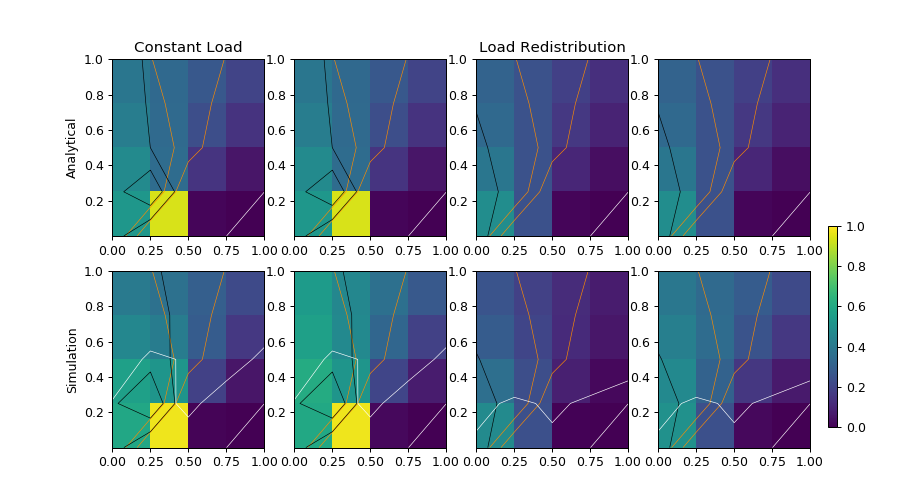

interactive(children=(IntSlider(value=0, description='Mshift', max=9), FloatSlider(value=0.35, description='cu…

In [24]:
%matplotlib notebook
cyc = True
if not cyc:
    fig1, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (8,8))
else:
    fig1, ((ax1,ax1_,ax2,ax2_),(ax3,ax3_,ax4,ax4_)) = plt.subplots(2,4, figsize = (12,6))
fig1.subplots_adjust(right=0.9)
cbar_ax = fig1.add_axes([0.92, 0.15, 0.01, 0.4])
fig1.colorbar(ax1.pcolormesh(M, S, X,vmin = 0, vmax=1,rasterized=True) , cax=cbar_ax)


def update(Mshift=IntSlider(min=0, max=len(shifts)-1, step=1, value=0),cut=FloatSlider(min=0.05, max=0.49, step=0.05, value=0.35),Contour=['Xbase',"Xbasenet",0.1,0.2,0.25,0.3],Levels=[3,2]):        
    ###ANALYTICAL###
    #Constant Load 
    X   = ResultsAna[shifts[Mshift]]["out"][-2]
    X_1 = ResultsAna[shifts[Mshift]]["out"][-1]
    ax1.clear()
    ax1.set_title("Constant Load")
    ax1.set_ylabel("Analytical")
    plot_X(X,ax1)
    plot_contour(X,X_1,ax1,cut,Levels,Contour)
    if cyc:
        ax1_.clear()
        plot_X(X_1,ax1_)
        plot_contour(X,X_1,ax1_,cut,Levels,Contour)
        
    #Load Redistribution
    X   = ResultsAna[shifts[Mshift]]["red"][-2]
    X_1 = ResultsAna[shifts[Mshift]]["red"][-1]
    ax2.clear()
    ax2.set_title("Load Redistribution")
    plot_X(X,ax2)
    plot_contour(X,X_1,ax2,cut,Levels,Contour)
    if cyc:
        ax2_.clear()
        plot_X(X_1,ax2_)
        plot_contour(X,X_1,ax2_,cut,Levels,Contour)
    
    ###SIMULATION###
    #Constant Load 
    X =np.array([[X[-1] for X in results] for results in ResultsSim[shifts[Mshift]]["out"]])
    X_1 =np.array([[X[-2] for X in results] for results in ResultsSim[shifts[Mshift]]["out"]])
    ax3.clear()
    ax3.set_ylabel("Simulation")
    plot_X(X,ax3)
    plot_contour(X,X_1,ax3,cut,Levels,Contour)
    if cyc:
        ax3_.clear()
        plot_X(X_1,ax3_)
        plot_contour(X,X_1,ax3_,cut,Levels,Contour)
    
    #Load Redistribution
    X =np.array([[X[-1] for X in results] for results in ResultsSim[shifts[Mshift]]["red"]])
    X_1 =np.array([[X[-2] for X in results] for results in ResultsSim[shifts[Mshift]]["red"]])
    ax4.clear()
    plot_X(X,ax4)
    plot_contour(X,X_1,ax4,cut,Levels,Contour)
    if cyc:
        ax4_.clear()
        plot_X(X_1,ax4_)
        plot_contour(X,X_1,ax4_,cut,Levels,Contour)
        
    fig1.canvas.draw_idle()
    fig1.canvas.set_window_title("Mshift = "+str(shifts[Mshift]))
    

interact(update);

In [23]:
%matplotlib notebook


XTensor={"Ana":{"out":[], "red":[]},"Sim":{"out":[], "red":[]}}
for phi in ["out", "red"]:
    XTensor["Ana"][phi].append(np.array([ResultsAna[shift][phi][-2] for shift in shifts]))
    XTensor["Ana"][phi].append(np.array([ResultsAna[shift][phi][-1] for shift in shifts]))
    XTensor["Sim"][phi].append(np.array([[[X[-1] for X in results] for results in ResultsSim[shift][phi]] for shift in shifts])
    XTensor["Sim"][phi].append(np.array([[[X[-2] for X in results] for results in ResultsSim[shift][phi]] for shift in shifts])

    

fig2,((bx1,bx2),(bx3,bx4),(bx5,bx6)) = plt.subplots(3,2, figsize = (8,8))
plot_stats(bx1, XTensor["Ana"]["out"][0],XTensor["Ana"]["out"][1], label = True)
fig2.legend(loc=7)
fig2.show()

def update(cut=FloatSlider(min=0.05, max=0.49, step=0.025, value=0.35),Contour=['Xbase',"Xbasenet",0.1,0.2,0.25,0.3],xlim=IntSlider(min=1, max=100, step=3, value=0)):        
    ###ANALYTICAL###
   
    bx1.clear()
    bx2.clear()
    plot_stats(bx1, XTensor["Ana"]["out"][0],XTensor["Ana"]["out"][1], cut, Contour, xlim)
    plot_stats(bx2, XTensor["Ana"]["red"][0],XTensor["Ana"]["red"][1], cut, Contour, xlim)
    
    
    bx3.clear()
    bx4.clear()
    plot_stats(bx1, XTensor["Sim"]["out"][0],XTensor["Sim"]["out"][1], cut, Contour, xlim)
    plot_stats(bx2, XTensor["Sim"]["red"][0],XTensor["Sim"]["red"][1], cut, Contour, xlim)
    
    
    bx5.clear()
    bx6.clear()
    
    fig2.canvas.draw_idle()
    fig2.canvas.set_window_title("Cut = "+str(cut))

interact(update);

SyntaxError: invalid syntax (<ipython-input-23-b72dd03bc257>, line 9)